<a href="https://colab.research.google.com/github/SenaKymk/naive_bayes_YZM212_lab/blob/main/LogisticRegression/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Modeli - Scikit-Learn Uygulaması
🍄 Mushroom Dataset - Logistic Regression Uygulaması

Bu çalışmada, UCI Mushroom veri seti kullanılarak **Logistic Regression** uygulanmıştır.
Amaç, mantarların fiziksel özelliklerine göre **zehirli (poisonous)** veya **yenilebilir (edible)** olup olmadığını tahmin etmektir.

In [55]:
!pip install ucimlrepo

Veri analizi, modelleme ve görselleştirme için gerekli kütüphaneler yükleniyor ve import ediliyor.


In [66]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Veri Setinin Yüklenmesi ve İncelenmesi

Veri seti, `sklearn.datasets` içinden `fetch_ucirepo` fonksiyonu kullanılarak yüklenmiştir.

Özellikler tamamen kategorik olduğu için, modellemeden önce uygun şekilde işlenmesi gerekmektedir.


In [57]:
mushroom = fetch_ucirepo(id=73)

X = mushroom.data.features
y = mushroom.data.targets
df = pd.DataFrame(data=mushroom.data.features)
df['target'] = mushroom.data.targets

Veri setindeki eksik değerler kontrol edilmiştir. Eksik değer varsa satırlar temizlenmiştir.


In [78]:
if df.isna().any().any():
  df.dropna(inplace=True)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


##  Label Encoding İşlemi

Tüm kategorik değişkenler **Label Encoding** yöntemiyle sayısal değerlere dönüştürülmüştür.

- One-hot encoding yerine label encoding tercih edilmiştir.
- Çünkü Logistic Regression modeli için **label encoding yeterli** olmuştur.
- Bu adım modelin daha hızlı ve sade çalışmasını sağlar.


In [81]:
from sklearn.preprocessing import LabelEncoder

# Tüm kolonlara Label Encoding uygula
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)
df_encoded.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,5,2,4,1,6,1,0,1,2,0,...,5,5,0,0,1,3,1,3,5,1
1,5,2,7,1,0,1,0,0,2,0,...,5,5,0,0,1,3,2,2,1,0
2,0,2,6,1,3,1,0,0,3,0,...,5,5,0,0,1,3,2,2,3,0
3,5,3,6,1,6,1,0,1,3,0,...,5,5,0,0,1,3,1,3,5,1
4,5,2,3,0,5,1,1,0,2,1,...,5,5,0,0,1,0,2,0,1,0


In [82]:
# Target (bağımlı değişken) sütunu 'target'
y = df_encoded['target']

# Geri kalanlar bağımsız değişken (features)
X = df_encoded.drop('target', axis=1)


Veri seti %80 eğitim ve %20 test olarak ayrılmıştır.


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Logistic Regression modeli eğitilmiş ve eğitim süresi hesaplanmıştır.


In [71]:
 #Eğitim süresi ölçümü
start_train = time.time()
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
train_time = time.time() - start_train

In [72]:
# Tahmin süresi ölçümü
start_test = time.time()
y_pred = log_reg.predict(X_test)
test_time = time.time() - start_test

In [73]:
# Performans ölçümleri
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

Accuracy: 0.9601




Modelin detaylı performans raporu (Precision, Recall, F1-Score) ve Karmaşıklık Matrisi hesaplanmıştır.


In [74]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       705
           1       0.96      0.93      0.95       424

    accuracy                           0.96      1129
   macro avg       0.96      0.95      0.96      1129
weighted avg       0.96      0.96      0.96      1129


Confusion Matrix:
 [[689  16]
 [ 29 395]]


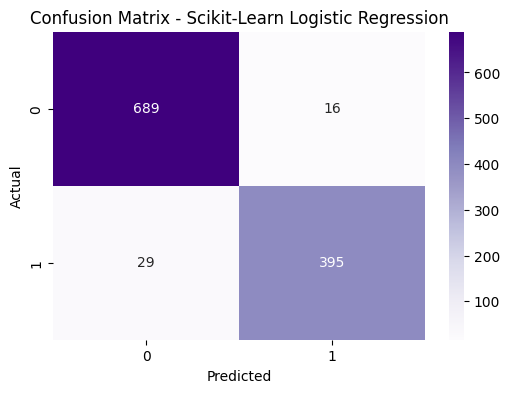

In [75]:
# Karmaşıklık Matrisi Görselleştirmesi
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Scikit-Learn Logistic Regression")
plt.show()


**Confusion matrix yorumu**

689 adet yenilebilir mantarı doğru tahmin etmiş.

16 yenilebilir mantarı yanlışlıkla zehirli demiş (False Positive)

395 zehirliyi doğru tahmin etmiş.

29 zehirliyi yanlışlıkla yenilebilir demiş False Negative

In [76]:

print(f"Eğitim süresi: {train_time:.4f} saniye")
print(f"Test süresi: {test_time:.4f} saniye")

Eğitim süresi: 0.1291 saniye
Test süresi: 0.0028 saniye


**SONUÇ VE YORUM**

Model yüksek doğruluk (%96) ve dengeli precision/recall skorları üretiyor.

Eğitim ve test süresi çok kısa → Model hızlı çalışıyor.

Riskli kısım: Zehirli olanlardan 29 tanesi yanlışlıkla yenilebilir sınıfa tahmin edilmiş → Recall sınıf 1'de biraz daha iyileştirilebilir.

Genelde mükemmel sonuç, veri seti iyi ayırt edici olduğu için model güçlü sonuç vermiş.

In [77]:
LogisticRegression()

LogisticRegression()